In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Figure size 432x288 with 0 Axes>

In [2]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

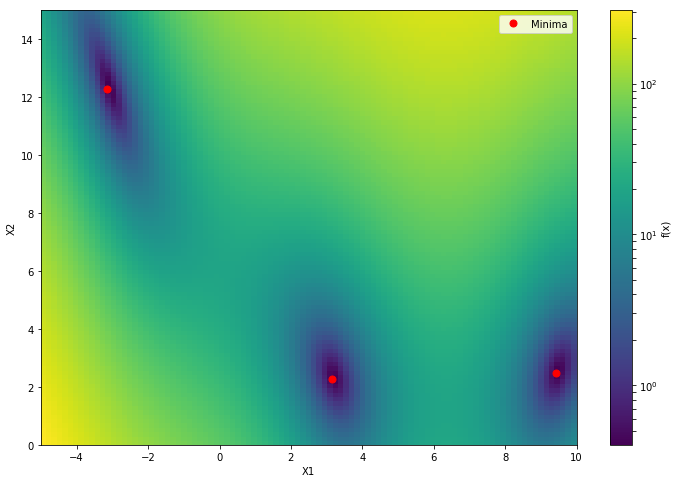

In [3]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [4]:
ntrain = 50 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [5]:
qei_args_dict = {'num_sampled_points': 3,
               'num_batches_eval' : 400,
               'strategy_batch_selection' : 'random'}
opt = Optimizer(bounds, base_estimator="gp", acq_func = 'qEI',
                acq_optimizer = 'sampling', random_state = 123, acq_func_kwargs = qei_args_dict)

qEI aquisition function (parallel BGO) is still under development
----------------------------------------
Right now, it can only be used with sampling acq_optimizer


In [6]:
opt.acq_optimizer

'sampling'

In [7]:
opt.tell(X_train.tolist(), Y_train.tolist())

we are here :: qEI


          fun: 0.454993414507193
    func_vals: array([ 38.02139204,   6.84686835,   3.84769098,  46.59864996,
       106.03068841,  17.26558586,  57.94172046,  12.99403395,
        37.08600539,  33.22398312, 138.778057  ,  44.41353045,
        20.17648984,  15.83438464,  16.37311789,  21.60955363,
       177.84822597, 101.88955032,  59.36459719,  17.42976814,
        29.01136075, 137.9990274 ,  47.63844269,  15.39186586,
        28.03105857,  60.11433157,  17.99784872, 113.18550174,
        43.29446292,  98.12992219,  26.65863116, 170.3432751 ,
        30.36408375,  18.13490032,   9.10906695,   3.83218899,
         6.91201808,   0.45499341,  87.91668479,  53.59800883,
       171.20195916,  84.1924601 ,  26.90390004,  70.32490478,
       218.07823256,  53.36640107,  39.32534174,  11.68385873,
        94.2446718 ,   3.72747342])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_leve

In [8]:
a = opt.ask()

In [9]:
a[0]

[[7.188551262710785, 11.094116972524866],
 [-0.30269858753102774, 5.543312861146443],
 [-4.919700674204956, 0.2022531035972503]]

In [10]:
a = 3

In [11]:
if a is not None:
    print('a')

a


In [12]:
np.array(opt.space.transformed_bounds)[:,1]

array([1., 1.])

In [13]:
opt.space

Space([Real(low=-5.0, high=10.0, prior='uniform', transform='normalize'),
       Real(low=0.0, high=15.0, prior='uniform', transform='normalize')])